In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [56]:
df = pd.DataFrame(pd.read_csv("world.csv"))
df.head()

,Country,Region,Population,Area(sq.mi.),Pop.Density(persq.mi.),Coastline(coast/arearatio),Netmigration,Infantmortality(per1000births),GDP($percapita),Literacy(%),Phones(per1000),Arable(%),Crops(%),Other(%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [64]:
df1 = df.dropna()
df2 = df1.iloc[:,2:]
df2.head(5)

,Population,Area(sq.mi.),Pop.Density(persq.mi.),Coastline(coast/arearatio),Netmigration,Infantmortality(per1000births),GDP($percapita),Literacy(%),Phones(per1000),Arable(%),Crops(%),Other(%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"


In [90]:
df3 = df2.iloc[:, 2:]
df3.drop(["GDP($percapita)"], axis = 1)
df3.head()

,Pop.Density(persq.mi.),Coastline(coast/arearatio),Netmigration,Infantmortality(per1000births),GDP($percapita),Literacy(%),Phones(per1000),Arable(%),Crops(%),Other(%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"


In [91]:
def clean_col(c):
    new_col = []
    for r in c:
        if r.isdigit():
            new_col.append(float(r))
        else:
            vals = r.split(",")
            if vals[0].isdigit() and vals[1].isdigit():
                num = float(vals[0]) + (float(vals[1]) * (.1 ** len(vals[1])))
                new_col.append(num)
            elif vals[0][0] == "-" and vals[1].isdigit():
                num = (-1 * float(vals[0][1:])) - (float(vals[1]) * (.1 ** len(vals[1])))
                new_col.append(num)
            else:
                new_col.append(None)
    return new_col


def new_num(r):
     if r.isdigit():
        return float(r)
     else:
        vals = r.split(",")
        if vals[0].isdigit() and vals[1].isdigit():
            num = float(vals[0]) + (float(vals[1]) * (.1 ** len(vals[1])))
            return (num)
        elif vals[0][0] == "-" and vals[1].isdigit():
            num = (-1 * float(vals[0][1:])) - (float(vals[1]) * (.1 ** len(vals[1])))
            return (num)
        else:
            return (None)

for i, row in df3.iterrows():
    for j, column in row.iteritems():
        if not isinstance(column, float):
            df3.set_value(i, j, float(new_num(column)))


df3["Population"] = df2["Population"]
df3["Area(sq.mi.)"] = df2["Area(sq.mi.)"]
df3["GDP($percapita)"] = df2["GDP($percapita)"]

df3.head()
#print(clean_col(df2["Agriculture"]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Pop.Density(persq.mi.),Coastline(coast/arearatio),Netmigration,Infantmortality(per1000births),GDP($percapita),Literacy(%),Phones(per1000),Arable(%),Crops(%),Other(%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Population,Area(sq.mi.)
0,48,0,23.06,163.07,700.0,36,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38,31056997,647500
1,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579,3581655,28748
2,13.8,0.04,-0.39,31,6000.0,70,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298,32930091,2381740
6,132.1,59.8,10.76,21.03,8600.0,95,460,0,0,100,2,14.17,5.34,0.04,0.18,0.78,13477,102
7,156,34.54,-6.15,19.46,11000.0,89,549.9,18.18,4.55,77.27,2,16.93,5.37,0.038,0.22,0.743,69108,443


In [102]:
df3.to_csv("clean_world.csv")

In [103]:
df4 = pd.DataFrame(pd.read_csv("clean_world.csv"))
df4.head()

,Unnamed: 0,Pop.Density(persq.mi.),Coastline(coast/arearatio),Netmigration,Infantmortality(per1000births),GDP($percapita),Literacy(%),Phones(per1000),Arable(%),Crops(%),Other(%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Population,Area(sq.mi.)
0,0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,31056997,647500
1,1,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,3581655,28748
2,2,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,32930091,2381740
3,6,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,13477,102
4,7,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743,69108,443


                                Unnamed: 0  Pop.Density(persq.mi.)  \
Unnamed: 0                        1.000000                0.020027   
Pop.Density(persq.mi.)            0.020027                1.000000   
Coastline(coast/arearatio)        0.020880                0.164036   
Netmigration                     -0.066842                0.161705   
Infantmortality(per1000births)   -0.022118               -0.143214   
GDP($percapita)                  -0.030122                0.190122   
Literacy(%)                       0.038638                0.086090   
Phones(per1000)                  -0.047964                0.157072   
Arable(%)                        -0.010080               -0.059223   
Crops(%)                          0.138906               -0.036580   
Other(%)                         -0.061578                0.066753   
Climate                          -0.048224               -0.012370   
Birthrate                         0.034633               -0.174565   
Deathrate           

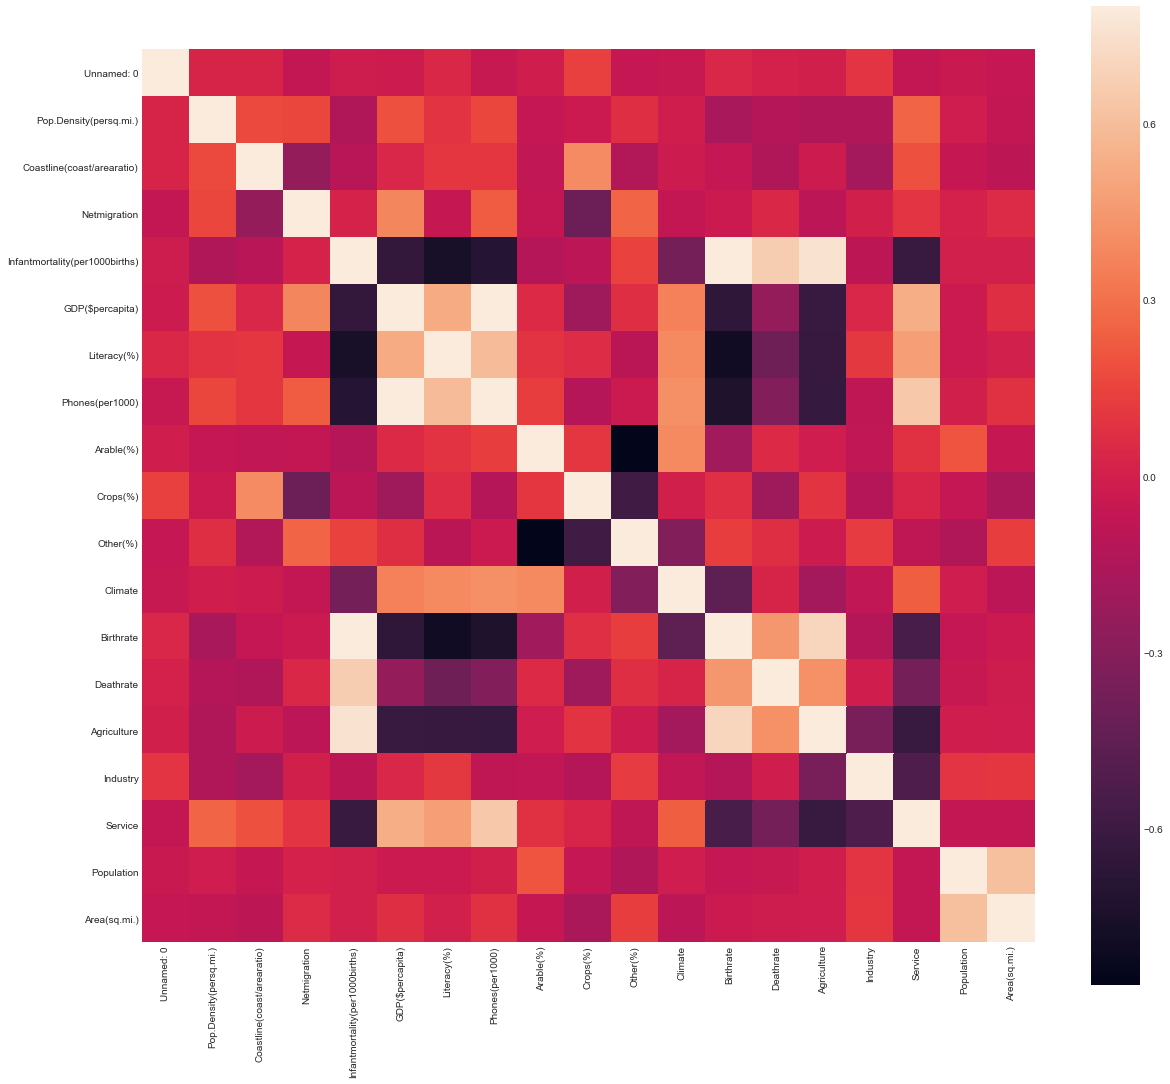

In [106]:
# Make the correlation matrix.
corrmat = df4.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [24]:
#c_to_drop = ["Country",  "Region" , "Climate"]
#df_cont = df.drop(c_to_drop, axis = 1)
#df_cont.head()

,Population,Area(sq.mi.),Pop.Density(persq.mi.),Coastline(coast/arearatio),Netmigration,Infantmortality(per1000births),GDP($percapita),Literacy(%),Phones(per1000),Arable(%),Crops(%),Other(%),Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65","46,6","20,34","0,38","0,24","0,38"
1,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49","15,11","5,22","0,232","0,188","0,579"
2,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53","17,14","4,61","0,101","0,6","0,298"
3,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,"22,46","3,27",NaN,NaN,NaN
4,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78","8,71","6,25",NaN,NaN,NaN
